# Data in Julia

Some (but not all!) popular packages for data representation, manipulation, and visualization

## DataFrames.jl

Similar to pandas in Python, DataFrames is a library for data representation and manipulation

In [1]:
using DataFrames

In [2]:
names = DataFrame(ID = [20, 40], Name = ["John Doe", "Jane Doe"])

,ID,Name
,Int64,String
1,20,John Doe
2,40,Jane Doe


In [3]:
jobs = DataFrame(ID = [20, 40], Job = ["Lawyer", "Doctor"])

,ID,Job
,Int64,String
1,20,Lawyer
2,40,Doctor


A DataFrame isn't a matrix, it operates more like a database. For example, you can do joins with DataFrames

In [4]:
join(names, jobs, on = :ID)

,ID,Name,Job
,Int64,String,String
1,20,John Doe,Lawyer
2,40,Jane Doe,Doctor


# Database Interaction

C wrappers and full Julia implementations for many databases, such as
+ [SQLite.jl](https://github.com/JuliaDatabases/SQLite.jl)
+ [MySQL.jl](https://github.com/JuliaDatabases/MySQL.jl)
+ [LibPQ.jl](https://github.com/invenia/LibPQ.jl)

In [5]:
using SQLite

In [6]:
db = SQLite.DB("Chinook_Sqlite.sqlite")

SQLite.DB("Chinook_Sqlite.sqlite")

In [7]:
SQLite.Query(db, "SELECT * FROM Album WHERE Title LIKE @word"; values=Dict(:word => "%time%")) |> DataFrame

,AlbumId,Title,ArtistId
,Int64⍰,String⍰,Int64⍰
1,76,King For A Day Fool For A Lifetime,82
2,111,Somewhere in Time,90
3,187,Out Of Time,122


## RDatasets.jl

Many sample datasets that are included in R and others that are popular in R

In [8]:
using RDatasets

In [9]:
iris = dataset("datasets", "iris")
first(iris, 4)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


In [10]:
sort!(iris, :PetalLength)
ismall = first(iris, 6)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,4.6,3.6,1.0,0.2,setosa
2,4.3,3.0,1.1,0.1,setosa
3,5.8,4.0,1.2,0.2,setosa
4,5.0,3.2,1.2,0.2,setosa
5,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.3,0.4,setosa


## Query.jl

Allows for querying many data structures, including DataFrames, to create new DataFrames or matrices

In [11]:
using Query

In [12]:
queried = @from i in ismall begin
    @where i.SepalWidth < 4.2 && i.SepalLength > 5.4
    @select {i.SepalWidth, i.SepalLength, i.Species}
    @collect DataFrame
end

,SepalWidth,SepalLength,Species
,Float64,Float64,Categorical…
1,4.0,5.8,setosa


We can also do this with logical indexing, using the different columns as Arrays

In [13]:
x = ismall[!, :SepalWidth] .< 4.2

6-element BitArray{1}:
 1
 1
 1
 1
 1
 1

In [14]:
y = ismall[!, :SepalLength] .> 5.4

6-element BitArray{1}:
 0
 0
 1
 0
 0
 0

In [15]:
indices = x .& y

6-element BitArray{1}:
 0
 0
 1
 0
 0
 0

In [16]:
queried

,SepalWidth,SepalLength,Species
,Float64,Float64,Categorical…
1,4.0,5.8,setosa


In [17]:
ismall[indices, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.8,4.0,1.2,0.2,setosa


## Gadfly.jl

A popular pure-Julia data visualization package. Other options include [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl) (wrapper of matplotlib), [GR.jl](https://github.com/jheinen/GR.jl) (wrapper of GR), and [Plots.jl](https://github.com/JuliaPlots/Plots.jl) (meta-wrapper)

In [18]:
using Gadfly

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/d9w/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping at dataframes.jl:96 [inlined]
└ @ Core /home/d9w/.julia/packages/Gadfly/09PWZ/src/dataframes.jl:96


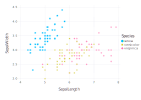

In [19]:
plot(iris, x="SepalLength", y="SepalWidth", color="Species", shape="Species", Geom.point)

In [20]:
using Distributions

In [21]:
X = rand(MultivariateNormal([0.0, 0.0], [1.0 0.5; 0.5 1.0]), 10000);
println(X[1:10])

[1.1058063270138778, 0.48263147399183204, -1.361454808508512, -0.19995953082250173, -1.6522068278970796, -0.5467814476758401, -0.2345114494492488, 1.4931372487075465, -0.9841703863258605, -1.3899466454803642]


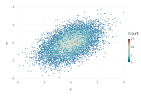

In [22]:
plot(x=X[1,:], y=X[2,:], Geom.hexbin)